<a href="https://colab.research.google.com/github/Raja-18/machine_learning/blob/master/6_2_FFN_MultiClass_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np                                           #for np arrays

import matplotlib.pyplot as plt                              #for ploting
import matplotlib.colors

from tqdm import tqdm_notebook                               #for analysing time taken for each epochs

from sklearn.metrics import accuracy_score, mean_squared_error    # for evaluation 
from sklearn.model_selection import train_test_split               # for test and train split
from sklearn.preprocessing import OneHotEncoder                    # for multicalss classification, encoding y
from sklearn.datasets import make_blobs                            # for making costum clustered datasets

In [ ]:
plt.style.use('seaborn')

In [ ]:
my_cmap=matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])  #color map for sigmoid 

In [ ]:
class FFN_MultiClass:
  
  def __init__(self, n_inputs, n_outputs, hidden_sizes=[3]):
    self.nx = n_inputs
    self.ny = n_outputs
    self.nh = len(hidden_sizes)
    self.sizes = [self.nx] + hidden_sizes + [self.ny] 

    self.W = {}
    self.B = {}
    for i in range(self.nh+1):
      self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
      self.B[i+1] = np.zeros((1, self.sizes[i+1]))
      
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def softmax(self, x):
    exps = np.exp(x)                                #exponent of each element in x(vector)
    return exps / np.sum(exps)                      #for each element in exps is dividied by sum of total elements in exps

  def forward_pass(self, x):
    self.A = {}
    self.H = {}
    self.H[0] = x.reshape(1, -1)
    for i in range(self.nh):                                                    #for binary classifi it will be (self.nh+1)
      self.A[i+1] = np.matmul(self.H[i], self.W[i+1]) + self.B[i+1]
      self.H[i+1] = self.sigmoid(self.A[i+1])
    self.A[self.nh+1] = np.matmul(self.H[self.nh], self.W[self.nh+1]) + self.B[self.nh+1]  #at last (before output)
    self.H[self.nh+1] = self.softmax(self.A[self.nh+1])
    return self.H[self.nh+1]
  
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred).squeeze()
 
  def grad_sigmoid(self, x):
    return x*(1-x) 
  
  def cross_entropy(self,label,pred):                                           #cross entropy loss for display purpose
    yl=np.multiply(pred,label)
    yl=yl[yl!=0]
    yl=-np.log(yl)
    yl=np.mean(yl)
    return yl
 
  def grad(self, x, y):
    self.forward_pass(x)
    self.dW = {}
    self.dB = {}
    self.dH = {}
    self.dA = {}
    L = self.nh + 1
    self.dA[L] = (self.H[L] - y)
    for k in range(L, 0, -1):
      self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
      self.dB[k] = self.dA[k]
      self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
      self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1])) 
    
  def fit(self, X, Y, epochs=100, initialize='True', learning_rate=0.01, display_loss=False):
      
    if display_loss:
      loss = {}
      
    if initialize:
      for i in range(self.nh+1):
        self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
        self.B[i+1] = np.zeros((1, self.sizes[i+1]))
        
    for epoch in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dW = {}
      dB = {}
      for i in range(self.nh+1):
        dW[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
        dB[i+1] = np.zeros((1, self.sizes[i+1]))
      for x, y in zip(X, Y):
        self.grad(x, y)
        for i in range(self.nh+1):
          dW[i+1] += self.dW[i+1]
          dB[i+1] += self.dB[i+1]
                  
      m = X.shape[1]
      for i in range(self.nh+1):
        self.W[i+1] -= learning_rate * (dW[i+1]/m)
        self.B[i+1] -= learning_rate * (dB[i+1]/m)
        
      if display_loss:
        Y_pred = self.predict(X) 
        loss[epoch] = self.cross_entropy(Y, Y_pred)
    
    if display_loss:
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      plt.ylabel('CE')
      plt.show()

In [ ]:
data,labels=make_blobs(n_samples=1000, centers=8, n_features=2, random_state=0) #used to genarate clustered datasets (centers-class)
print(data.shape, labels.shape)                                                 #labels - y  data -x

(1000, 2) (1000,)


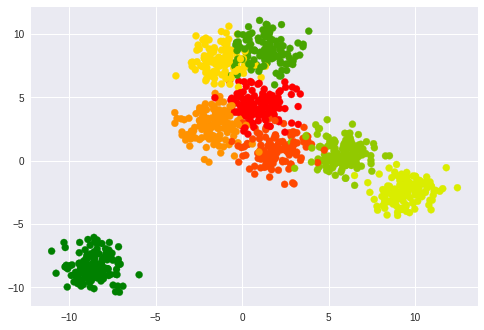

In [ ]:
plt.scatter(data[:,0],data[:,1],c=labels,cmap=my_cmap)
plt.show()

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(data,labels,random_state=0,stratify=labels)
print(x_train.shape,x_val.shape)
print(y_train.shape,y_val.shape)

(750, 2) (250, 2)
(750,) (250,)


In [ ]:
enc=OneHotEncoder()
y_oh_train=enc.fit_transform(np.expand_dims(y_train,axis=1)).toarray()
y_oh_val=enc.fit_transform(np.expand_dims(y_val,axis=1)).toarray()
print(y_oh_train.shape,y_oh_val.shape)

(750, 8) (250, 8)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


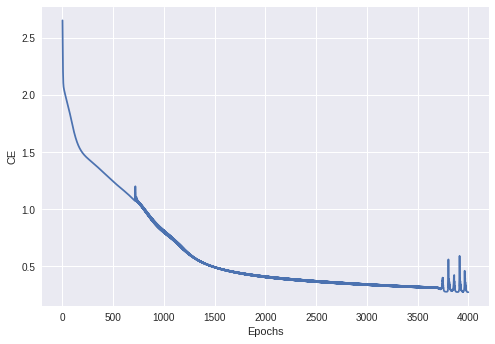

In [ ]:
ffn_multi=FFN_MultiClass(2,8,[3,4,4])       # 2 input feature 8 output class # rest of them hidden layer 
ffn_multi.fit(x_train,y_oh_train,epochs=4000,learning_rate=.001,display_loss=True)

In [ ]:
y_pred_train = ffn_multi.predict(x_train)
y_pred_train = np.argmax(y_pred_train,1)

y_pred_val = ffn_multi.predict(x_val)
y_pred_val = np.argmax(y_pred_val,1)

accuracy_train = accuracy_score(y_pred_train, y_train)
accuracy_val = accuracy_score(y_pred_val, y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.91
Validation accuracy 0.9


### predicted train data plot
* small dots - correctly predicted
* large dots - wrongly predicted

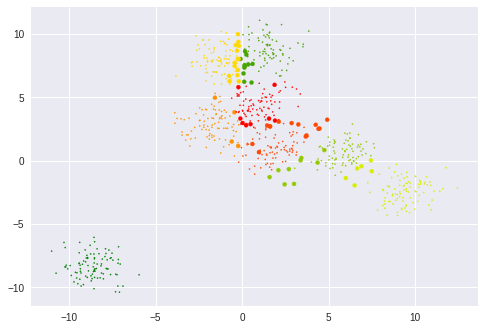

In [ ]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_pred_train, cmap=my_cmap, s=15*(np.abs(np.sign(y_pred_train-y_train))+.1))
plt.show()

### predicted test data plot
* small dots - correctly predicted
* large dots - wrongly predicted

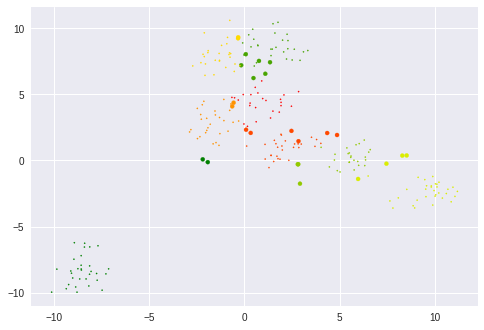

In [ ]:
plt.scatter(x_val[:,0], x_val[:,1], c=y_pred_val, cmap=my_cmap, s=15*(np.abs(np.sign(y_pred_val-y_val))+.1))
plt.show()

we can increase the accuracy by changing hiden layers (no. of layers and no. of neurons) , epochs, learning rate